# College Data

In [1]:
# Data science libraries
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import plotly.express as px
import seaborn as sns

# Local modules
import scripts.cccco as cccco
import scripts.college_scorecard as scorecard

## 1. Gather all relevant metadata on California Community Colleges using `colleges` endpoint of the [the CCC API](https://api.cccco.edu/)

### College and District Location

In [2]:
all_colleges = cccco.get_ccc_colleges()
all_districts = cccco.get_ccc_districts()

In [3]:
print(f"{all_colleges.shape[0]:,} rows")
all_colleges.head()

115 rows


,CollegeID,CollegeName,DistrictID,StreetAddress,City,County,Zip,ZipPlus4,MailingAddress,MailingCity,MailingZip,Phone,WebsiteURL,Latitude,Longitude,LogoURL,District
0,021,Cuyamaca College,020,900 Rancho San Diego Parkway,El Cajon,San Diego,92019,4304,900 Rancho San Diego Parkway,El Cajon,92019,619.660.4000,www.cuyamaca.edu,32.744890,-116.935229,CuyamacaCollegeLogo.jpg,None
1,022,Grossmont College,020,8800 Grossmont College Drive,El Cajon,San Diego,92020,1799,8800 Grossmont College Drive,El Cajon,92020,619.644.7000,www.grossmont.edu,32.817897,-117.005640,GrossmontCollegelogo.jpg,None
2,031,Imperial Valley College,030,380 East Aten Road,Imperial,Imperial,92251,9787,380 East Aten Road,Imperial,92251,760.352.8320,www.imperial.edu,32.825859,-115.502999,ImperialValleyCollegeLogocopy.jpg,None
3,051,MiraCosta College,050,1 Barnard Drive,Oceanside,San Diego,92056,3899,1 Barnard Drive,Oceanside,92056,760.757.2121,www.miracosta.edu,33.188864,-117.301064,Mira_Costa_College_Logo_4c.png,None
4,061,Palomar College,060,1140 West Mission Road,San Marcos,San Diego,92069,1487,1140 West Mission Road,San Marcos,92069,760.744.1150,www.palomar.edu,33.147015,-117.183980,PalomarCollegeLogo.jpg,None


In [4]:
print(f"{all_districts.shape[0]:,} rows")
all_districts.head()

73 rows


,DistrictID,DistrictName,DistrictTitle,StreetAddress,City,Zip,Phone,WebsiteURL,Boundaries,Colleges
0,020,Grossmont-Cuyamaca ...,Grossmont-Cuyamaca Community College District,8800 Grossmont College Drive,El Cajon,92020,619-644-7010,www.gcccd.edu,None,"[{'CollegeID': '021', 'CollegeName': 'Cuyamaca..."
1,030,Imperial ...,Imperial Community College District,380 E. Aten Road (PO Box 158),Imperial,92251,760-352-8320,www.imperial.edu,None,"[{'CollegeID': '031', 'CollegeName': 'Imperial..."
2,050,MiraCosta ...,MiraCosta Community College District,None,None,None,None,www.miracosta.edu,None,"[{'CollegeID': '051', 'CollegeName': 'MiraCost..."
3,060,Palomar ...,Palomar Community College District,1140 W. Mission Road,San Marcos,92069,760-744-1150,www.palomar.edu,None,"[{'CollegeID': '061', 'CollegeName': 'Palomar ..."
4,070,San Diego ...,San Diego Community College District,3375 Camino del Rio South,San Diego,92108,619-388-6500,www.sdccd.edu,None,"[{'CollegeID': '071', 'CollegeName': 'San Dieg..."


In [5]:
# Each distict has a number of colleges associated with it. These colleges are
# stored in dictionaries in the "Colleges" column.

all_districts["CollegesPerDistrict"] = all_districts["Colleges"].apply(len)

In [6]:
all_districts = all_districts[
    # This is Calbright College, which is the system's first online-only college
    # and doesn't have a physical campus. 
    all_districts["DistrictID"] != "210"
]

In [7]:
all_districts["CollegesPerDistrict"].value_counts()

CollegesPerDistrict
1    49
2    12
3     7
4     3
9     1
Name: count, dtype: int64

In [8]:
# There is a clear largest district. What is it? 

biggest_district = all_districts.loc[
    all_districts["CollegesPerDistrict"] == 9,
    "DistrictID"
]

all_colleges[all_colleges["DistrictID"].isin(biggest_district)]

,CollegeID,CollegeName,DistrictID,StreetAddress,City,County,Zip,ZipPlus4,MailingAddress,MailingCity,MailingZip,Phone,WebsiteURL,Latitude,Longitude,LogoURL,District
78,741,Los Angeles City College,740,855 North Vermont Avenue,Los Angeles,Los Angeles,90029,3590,855 North Vermont Avenue,Los Angeles,90029,323.953.4000,www.lacitycollege.edu,34.086844,-118.291864,Los Angeles CC-Logo.jpg,None
79,742,Los Angeles Harbor College,740,1111 Figueroa Place,Wilmington,Los Angeles,90744,2397,1111 Figueroa Place,Wilmington,90744,310.233.4000,www.lahc.edu,33.784817,-118.281649,LosAngelesHarborCollegelogo.jpg,None
80,743,Los Angeles Mission College,740,13356 Eldridge Avenue,Sylmar,Los Angeles,91342,3200,13356 Eldridge Avenue,Sylmar,91342,818.364.7600,www.lamission.edu,34.314604,-118.420189,LosAngelesMClogocopy.jpg,None
81,744,Los Angeles Pierce College,740,6201 Winnetka Avenue,Woodland Hills,Los Angeles,91371,0001,6201 Winnetka Avenue,Woodland Hills,91371,818.719.6401,www.piercecollege.edu,34.183189,-118.571124,LosAngelesPierceCollegeLogo.jpg,None
82,745,Los Angeles Southwest College,740,1600 West Imperial Highway,Los Angeles,Los Angeles,90047,4899,1600 West Imperial Highway,Los Angeles,90047,323.241.5225,www.lasc.edu,33.930808,-118.304588,Los Angeles Southwest-logo.jpg,None
83,746,Los Angeles Trade-Technical College,740,400 West Washington Boulevard,Los Angeles,Los Angeles,90015,4108,400 West Washington Boulevard,Los Angeles,90015,213.763.7000,www.lattc.edu,34.033038,-118.269624,LosAngelesTTlogo.jpg,None
84,747,Los Angeles Valley College,740,5800 Fulton Avenue,Van Nuys,Los Angeles,91401,4096,5800 Fulton Avenue,Van Nuys,91401,818.947.2600,www.lavc.edu,34.176044,-118.422335,Los Angeles Valley College-logo.jpg,None
85,748,East Los Angeles College,740,1301 Avenida Cesar Chavez,Monterey Park,Los Angeles,91754,6099,1301 Avenida Cesar Chavez,Monterey Park,91754,323.265.8650,www.elac.edu,34.039736,-118.148754,EastLosAngelesCollegeLogo.jpg,None
86,749,West Los Angeles College,740,9000 Overland Avenue,Culver City,Los Angeles,90230,5002,9000 Overland Avenue,Culver City,90230,310.287.4200,www.wlac.edu,34.001820,-118.391139,WLAC logo-color.jpg,None


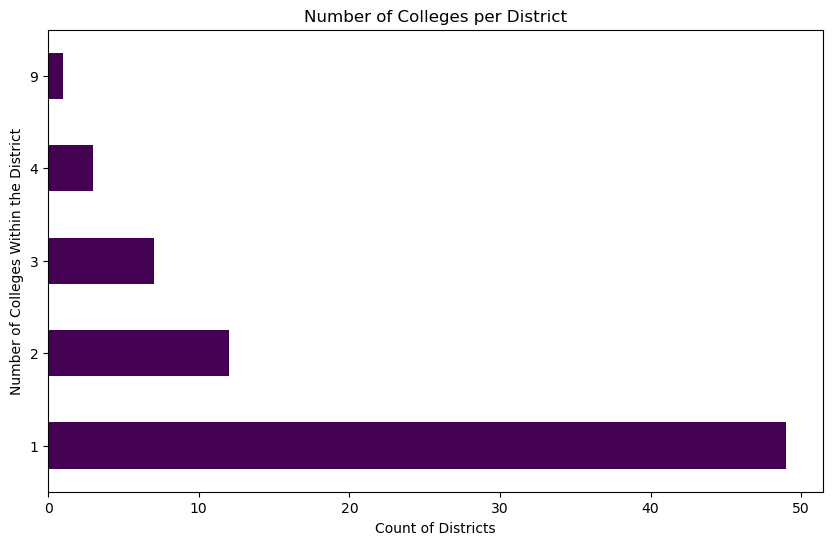

In [9]:
ax = all_districts["CollegesPerDistrict"].value_counts().plot(
    kind="barh",
    title="Number of Colleges per District",
    xlabel="Count of Districts",
    ylabel="Number of Colleges Within the District",
    figsize=(10, 6),
    rot=0,
    cmap='viridis'
)

#plt.savefig("./figures/number_of_colleges_per_district.png")
plt.show()

In [10]:
# If a distict has only one college, we'll call it a "Single College District"

all_districts.loc[
    all_districts["Colleges"].apply(len) == 1, "DistrictName"
] = "Single College District"

In [11]:
all_districts["DistrictName"].value_counts()

DistrictName
Single College District                                    49
Grossmont-Cuyamaca                                          1
Riverside                                                   1
South Orange County                                         1
Rancho Santiago                                             1
North Orange County                                         1
Coast                                                       1
Los Angeles                                                 1
Ventura County                                              1
Yosemite                                                    1
West Hills                                                  1
State Center                                                1
Kern                                                        1
West Valley-Mission                                         1
Chabot-Las Positas                                          1
San José-Evergreen                                       

In [12]:
# Append district data to the college dataset.

all_colleges = pd.merge(
    all_colleges,
    all_districts.drop(
        columns=[
            "StreetAddress",
            "City",
            "Zip",
            "Phone",
            "Boundaries",
            "Colleges",
        ]
    ),
    on='DistrictID',
    how='left',
    suffixes=('', 'District')
)

all_colleges.head()

,CollegeID,CollegeName,DistrictID,StreetAddress,City,County,Zip,ZipPlus4,MailingAddress,MailingCity,...,Phone,WebsiteURL,Latitude,Longitude,LogoURL,District,DistrictName,DistrictTitle,WebsiteURLDistrict,CollegesPerDistrict
0,021,Cuyamaca College,020,900 Rancho San Diego Parkway,El Cajon,San Diego,92019,4304,900 Rancho San Diego Parkway,El Cajon,...,619.660.4000,www.cuyamaca.edu,32.744890,-116.935229,CuyamacaCollegeLogo.jpg,None,Grossmont-Cuyamaca ...,Grossmont-Cuyamaca Community College District,www.gcccd.edu,2
1,022,Grossmont College,020,8800 Grossmont College Drive,El Cajon,San Diego,92020,1799,8800 Grossmont College Drive,El Cajon,...,619.644.7000,www.grossmont.edu,32.817897,-117.005640,GrossmontCollegelogo.jpg,None,Grossmont-Cuyamaca ...,Grossmont-Cuyamaca Community College District,www.gcccd.edu,2
2,031,Imperial Valley College,030,380 East Aten Road,Imperial,Imperial,92251,9787,380 East Aten Road,Imperial,...,760.352.8320,www.imperial.edu,32.825859,-115.502999,ImperialValleyCollegeLogocopy.jpg,None,Single College District,Imperial Community College District,www.imperial.edu,1
3,051,MiraCosta College,050,1 Barnard Drive,Oceanside,San Diego,92056,3899,1 Barnard Drive,Oceanside,...,760.757.2121,www.miracosta.edu,33.188864,-117.301064,Mira_Costa_College_Logo_4c.png,None,Single College District,MiraCosta Community College District,www.miracosta.edu,1
4,061,Palomar College,060,1140 West Mission Road,San Marcos,San Diego,92069,1487,1140 West Mission Road,San Marcos,...,760.744.1150,www.palomar.edu,33.147015,-117.183980,PalomarCollegeLogo.jpg,None,Single College District,Palomar Community College District,www.palomar.edu,1


In [13]:
fig = px.scatter_mapbox(
    all_colleges,
    lat="Latitude",
    lon="Longitude",
    hover_name="CollegeName",
    zoom=5,
    width=1200,
    height=800,
    color="DistrictName",
    title="Geographic Distribution of California Community Colleges",
    labels={
        "DistrictName": "District",
    },
)

fig.update_layout(
    mapbox_style="carto-positron",
    template="plotly_white",
)

fig.update_traces(marker=dict(size=6))

fig.write_html("./docs/california_community_colleges.html")
fig.show()

In [14]:
# Rank the districts by college count.

mc_district = all_districts.loc[all_districts["CollegesPerDistrict"] > 1, "DistrictID"]
all_colleges[all_colleges["DistrictID"].isin(mc_district)]["DistrictTitle"].value_counts()

DistrictTitle
Los Angeles Community College District            9
Los Rios Community College District               4
Peralta Community College District                4
State Center Community College District           4
Kern Community College District                   3
Ventura County Community College District         3
Riverside Community College District              3
Contra Costa Community College District           3
San Mateo County Community College District       3
Coast Community College District                  3
San Diego Community College District              3
South Orange County Community College District    2
Rancho Santiago Community College District        2
North Orange County Community College District    2
Grossmont-Cuyamaca Community College District     2
Yosemite Community College District               2
West Hills Community College District             2
West Valley-Mission Community College District    2
Chabot-Las Positas Community College District     

## 2. Gather all colleges in the CCC system that offer a degree or certificate in the programs of interest using `programs` endpoint [the CCC API](https://api.cccco.edu/)

In [15]:
# Example of use case

programs = [
    "Database",
    "Computer Science",
    "Data Science",
]

In [16]:
cccco_programs = pd.DataFrame()

for program in programs:
    df = cccco.get_ccc_programs(program)
    df["Program Query"] = program
    cccco_programs = pd.concat([cccco_programs, df])

In [17]:
print(f"{cccco_programs.shape[0]:,} rows")
cccco_programs.sample(10)

207 rows


,CollegeID,CollegeName,ProgramAward,CreditType,Title,TopCode,Program Query
2,551,San Joaquin Delta College,C,C,Computer Science,070200,Computer Science
43,731,Glendale Community College,T,C,Computer Science,070600,Computer Science
126,749,West Los Angeles College,T,C,Computer Science Information Technology,070200,Computer Science
15,963,Norco College,S,C,Data Science,070730,Data Science
0,233,Sacramento City College,M,C,Data Science,070200,Data Science
22,422,Foothill College,S,C,Computer Science,070600,Computer Science
27,592,Modesto Junior College,S,C,Computer Science,070600,Computer Science
25,343,Laney College,N,C,Data Science Fundamentals,070100,Data Science
4,749,West Los Angeles College,N,C,Data Science,070200,Data Science
5,231,American River College,S,C,CIS: Database Management,070720,Database


In [18]:
cccco_programs["Program Query"].value_counts()

Program Query
Computer Science    153
Data Science         28
Database             26
Name: count, dtype: int64

## 3. Merge the `colleges` endpoint data with the `programs` endpoint data (one row per college per program)

In [19]:
# Merge College Metadata with Program Data
# One row per college per program

college_data = pd.merge(
    all_colleges,
    cccco_programs.drop(columns=["CollegeName"]),
    on="CollegeID",
    how="right",
)

college_data.sort_values(by=["CollegeID", "Program Query"], inplace=True)

print(f"{college_data.shape[0]:,} rows")
college_data.head()

207 rows


,CollegeID,CollegeName,DistrictID,StreetAddress,City,County,Zip,ZipPlus4,MailingAddress,MailingCity,...,District,DistrictName,DistrictTitle,WebsiteURLDistrict,CollegesPerDistrict,ProgramAward,CreditType,Title,TopCode,Program Query
71,021,Cuyamaca College,020,900 Rancho San Diego Parkway,El Cajon,San Diego,92019,4304,900 Rancho San Diego Parkway,El Cajon,...,None,Grossmont-Cuyamaca ...,Grossmont-Cuyamaca Community College District,www.gcccd.edu,2,X,C,Computer Science,070600,Computer Science
72,022,Grossmont College,020,8800 Grossmont College Drive,El Cajon,San Diego,92020,1799,8800 Grossmont College Drive,El Cajon,...,None,Grossmont-Cuyamaca ...,Grossmont-Cuyamaca Community College District,www.gcccd.edu,2,X,C,Computer Science,070600,Computer Science
178,022,Grossmont College,020,8800 Grossmont College Drive,El Cajon,San Diego,92020,1799,8800 Grossmont College Drive,El Cajon,...,None,Grossmont-Cuyamaca ...,Grossmont-Cuyamaca Community College District,www.gcccd.edu,2,S,C,University Studies: Mathematics and Natural Sc...,490200,Computer Science
190,022,Grossmont College,020,8800 Grossmont College Drive,El Cajon,San Diego,92020,1799,8800 Grossmont College Drive,El Cajon,...,None,Grossmont-Cuyamaca ...,Grossmont-Cuyamaca Community College District,www.gcccd.edu,2,N,C,Data Science,070700,Data Science
73,031,Imperial Valley College,030,380 East Aten Road,Imperial,Imperial,92251,9787,380 East Aten Road,Imperial,...,None,Single College District,Imperial Community College District,www.imperial.edu,1,X,C,Computer Science,070600,Computer Science


## 4. Merge the college data with the DataMart program data (one row per college per program)

In [20]:
pass # Not implemented in this notebook

## 5. Merge the College Scorecard data

In [21]:
scorecard.get_scorecard_by_college("Solano")

,school_name,latest_student_size,latest_student_enrollment_undergrad_12_month,latest_student_demographics_over_23_at_entry,latest_student_demographics_first_generation,latest_student_demographics_median_hh_income,latest_student_demographics_student_faculty_ratio,latest_student_FAFSA_applications
0,Solano Community College,7213,11932,0.5,0.484509,72436,25,2251


In [22]:
import time

scorecard_data = pd.DataFrame()

for name, city in all_colleges[["CollegeName", "City"]].drop_duplicates().itertuples(index=False):
    time.sleep(0.25)
    try:
        scorecard_info = scorecard.get_scorecard_by_college(name, city, "CA")
        scorecard_data = pd.concat([scorecard_data, scorecard_info], ignore_index=True)
    except Exception as e:
        print(f"Error with {name}: {e}")

# Merge the scorecard data with the all_colleges DataFrame
all_colleges = pd.merge(
    all_colleges,
    scorecard_data,
    left_on="CollegeName",
    right_on="school_name",
    how="left"
).drop(columns=["school_name"])


print(f"{all_colleges.shape[0]:,} rows")
all_colleges.head()

Error with Lake Tahoe Community College: "None of [Index(['school_name'], dtype='object')] are in the [columns]"
Error with Los Angeles Valley College: "None of [Index(['school_name'], dtype='object')] are in the [columns]"
115 rows


,CollegeID,CollegeName,DistrictID,StreetAddress,City,County,Zip,ZipPlus4,MailingAddress,MailingCity,...,DistrictTitle,WebsiteURLDistrict,CollegesPerDistrict,latest_student_size,latest_student_enrollment_undergrad_12_month,latest_student_demographics_over_23_at_entry,latest_student_demographics_first_generation,latest_student_demographics_median_hh_income,latest_student_demographics_student_faculty_ratio,latest_student_FAFSA_applications
0,021,Cuyamaca College,020,900 Rancho San Diego Parkway,El Cajon,San Diego,92019,4304,900 Rancho San Diego Parkway,El Cajon,...,Grossmont-Cuyamaca Community College District,www.gcccd.edu,2,6527.0,12428.0,0.47,0.610113,61734.0,23.0,2901.0
1,022,Grossmont College,020,8800 Grossmont College Drive,El Cajon,San Diego,92020,1799,8800 Grossmont College Drive,El Cajon,...,Grossmont-Cuyamaca Community College District,www.gcccd.edu,2,10994.0,18249.0,0.39,0.550389,60424.0,19.0,5463.0
2,031,Imperial Valley College,030,380 East Aten Road,Imperial,Imperial,92251,9787,380 East Aten Road,Imperial,...,Imperial Community College District,www.imperial.edu,1,6952.0,10185.0,0.26,0.609207,45460.0,31.0,3798.0
3,051,MiraCosta College,050,1 Barnard Drive,Oceanside,San Diego,92056,3899,1 Barnard Drive,Oceanside,...,MiraCosta Community College District,www.miracosta.edu,1,10094.0,16847.0,0.43,0.509714,68755.0,19.0,4602.0
4,061,Palomar College,060,1140 West Mission Road,San Marcos,San Diego,92069,1487,1140 West Mission Road,San Marcos,...,Palomar Community College District,www.palomar.edu,1,15057.0,26222.0,0.44,0.538365,68227.0,21.0,5316.0


In [23]:
# Top 5 largest colleges by annual enrollment

all_colleges.sort_values("latest_student_enrollment_undergrad_12_month", ascending=False).head()

,CollegeID,CollegeName,DistrictID,StreetAddress,City,County,Zip,ZipPlus4,MailingAddress,MailingCity,...,DistrictTitle,WebsiteURLDistrict,CollegesPerDistrict,latest_student_size,latest_student_enrollment_undergrad_12_month,latest_student_demographics_over_23_at_entry,latest_student_demographics_first_generation,latest_student_demographics_median_hh_income,latest_student_demographics_student_faculty_ratio,latest_student_FAFSA_applications
85,748,East Los Angeles College,740,1301 Avenida Cesar Chavez,Monterey Park,Los Angeles,91754,6099,1301 Avenida Cesar Chavez,Monterey Park,...,Los Angeles Community College District,www.laccd.edu,9,23499.0,49266.0,0.31,0.685203,45627.0,29.0,7896.0
17,231,American River College,230,4700 College Oak Drive,Sacramento,Sacramento,95841,4286,4700 College Oak Drive,Sacramento,...,Los Rios Community College District,www.losrios.edu,4,24054.0,41538.0,0.52,0.514148,59196.0,27.0,7428.0
98,871,Santa Ana College,870,1530 W. 17th Street,Santa Ana,Orange County,92706,3398,1530 W. 17th Street,Santa Ana,...,Rancho Santiago Community College District,www.rsccd.edu,2,20309.0,38996.0,0.32,0.696058,69027.0,31.0,3832.0
52,521,Bakersfield College,520,1801 Panorama Drive,Bakersfield,Kern County,93305,1299,1801 Panorama Drive,Bakersfield,...,Kern Community College District,www.kccd.edu,3,18098.0,37017.0,0.36,0.630508,46274.0,28.0,8128.0
88,781,Santa Monica College,780,1900 Pico Boulevard,Santa Monica,Los Angeles,90405,1628,1900 Pico Boulevard,Santa Monica,...,Santa Monica Community College District,www.smc.edu,1,20376.0,34036.0,0.25,0.501535,54172.0,26.0,7297.0


In [24]:
# Top 5 smallest colleges by annual enrollment

all_colleges[
    all_colleges["latest_student_enrollment_undergrad_12_month"].notna()
].sort_values("latest_student_enrollment_undergrad_12_month", ascending=True).head()

,CollegeID,CollegeName,DistrictID,StreetAddress,City,County,Zip,ZipPlus4,MailingAddress,MailingCity,...,DistrictTitle,WebsiteURLDistrict,CollegesPerDistrict,latest_student_size,latest_student_enrollment_undergrad_12_month,latest_student_demographics_over_23_at_entry,latest_student_demographics_first_generation,latest_student_demographics_median_hh_income,latest_student_demographics_student_faculty_ratio,latest_student_FAFSA_applications
15,181,College of the Siskiyous,180,800 College Avenue,Weed,Siskiyou,96094,2899,800 College Avenue,Weed,...,Siskiyou Joint Community College District,www.siskiyous.edu,1,932.0,2421.0,0.39,0.446043,45814.0,13.0,810.0
11,131,Lassen Community College,130,478-200 Hwy 139,Susanville,Lassen,96130,3000,PO Box 3000,Susanville,...,Lassen Community College District,www.lassencollege.edu,1,1431.0,2885.0,0.41,0.549383,52031.0,13.0,383.0
64,591,Columbia College,590,11600 Columbia College Drive,Sonora,Tuolumne,95370,8518,11600 Columbia College Drive,Sonora,...,Yosemite Community College District,www.yosemite.edu,2,1801.0,3304.0,0.51,0.534121,53192.0,14.0,877.0
103,911,Barstow Community College,910,2700 Barstow Road,Barstow,San Bernardino,92311,6699,2700 Barstow Road,Barstow,...,Barstow Community College District,www.barstow.edu,1,2496.0,3615.0,0.61,0.531070,50748.0,21.0,1973.0
54,523,Porterville College,520,100 East College Avenue,Porterville,Tulare,93257,5901,100 East College Avenue,Porterville,...,Kern Community College District,www.kccd.edu,3,2757.0,5062.0,0.35,0.630058,42464.0,24.0,1845.0


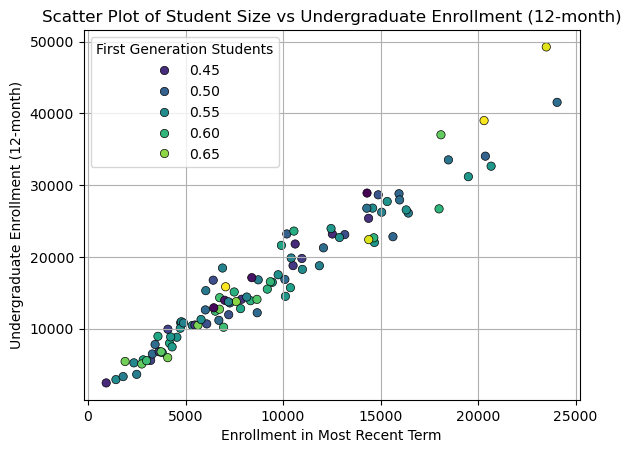

In [25]:
sns.scatterplot(
    data=all_colleges,
    x="latest_student_size",
    y="latest_student_enrollment_undergrad_12_month",
    hue="latest_student_demographics_first_generation",
    palette="viridis",
    edgecolor="black"
)
plt.title("Scatter Plot of Student Size vs Undergraduate Enrollment (12-month)")
plt.xlabel("Enrollment in Most Recent Term")
plt.ylabel("Undergraduate Enrollment (12-month)")
plt.legend(title="First Generation Students")
plt.grid(True)

#plt.savefig('./figures/student_size_vs_undergraduate_enrollment.png', bbox_inches='tight')
plt.show()

In [ ]:
y_mean = all_colleges.groupby("latest_student_demographics_student_faculty_ratio")[
    "latest_student_enrollment_undergrad_12_month"
].mean()
y_std = all_colleges.groupby("latest_student_demographics_student_faculty_ratio")[
    "latest_student_enrollment_undergrad_12_month"
].std()

plot_data = pd.DataFrame(
    {
        "Student Faculty Ratio": y_mean.index,
        "Mean Enrollment": y_mean.values,
        "Enrollment Std Dev": y_std.values,
    }
)

# Plot with error bars
fig = px.scatter(
    plot_data,
    x="Student Faculty Ratio",
    y="Mean Enrollment",
    error_y="Enrollment Std Dev",
    color_continuous_scale="viridis",
    title="Mean Enrollment vs Student Faculty Ratio",
    labels={"Student Faculty Ratio": "Student Faculty Ratio", "Mean Enrollment": "Mean Enrollment"},
    template="gridon"
)

fig.update_traces(marker=dict(size=6, line=dict(width=2, color="DarkSlateGrey")))

fig.show()

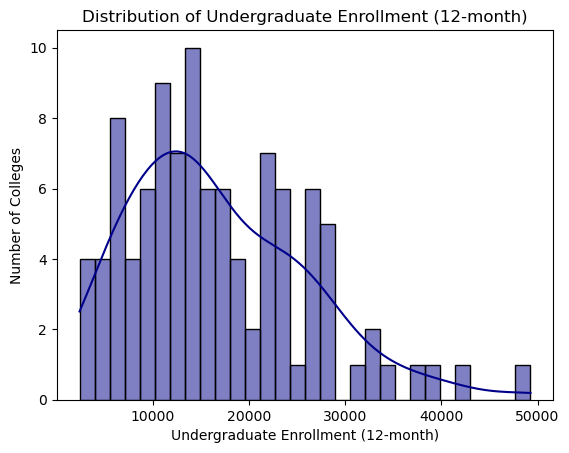

In [27]:
sns.histplot(
    data=all_colleges,
    x="latest_student_enrollment_undergrad_12_month",
    bins=30,
    kde=True,
    color="darkblue",
    edgecolor="black",
)
plt.title("Distribution of Undergraduate Enrollment (12-month)")
plt.xlabel("Undergraduate Enrollment (12-month)")
plt.ylabel("Number of Colleges")

plt.savefig('./figures/undergraduate_enrollment_distribution.png', bbox_inches='tight')
plt.show()

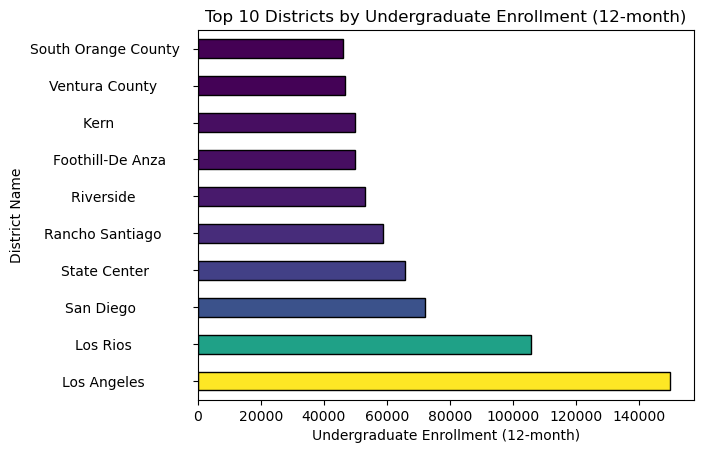

In [ ]:
# Rank districts by sum("latest_student_enrollment_undergrad_12_month")

all_districts = cccco.get_ccc_districts()

district_enrollment = all_colleges.groupby("DistrictID")[
    "latest_student_enrollment_undergrad_12_month"
].sum().reset_index()

district_enrollment = pd.merge(
    district_enrollment,
    all_districts[["DistrictID", "DistrictName"]],
    on="DistrictID",
    how="left"
)

to_plot = district_enrollment.set_index("DistrictName")[
    "latest_student_enrollment_undergrad_12_month"
].sort_values(ascending=False).head(10)

# Create a color scale based on the size of the bars
norm = plt.Normalize(to_plot.min(), to_plot.max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])

ax = to_plot.plot(
    kind="barh",
    title="Top 10 Districts by Undergraduate Enrollment (12-month)",
    xlabel="Undergraduate Enrollment (12-month)",
    color=plt.cm.viridis(norm(to_plot)),
    edgecolor="black",
)

ax.set_ylabel("District Name")
ax.set_yticklabels(ax.get_yticklabels(), ha='right', position=(0.3, 0))

fig = ax.get_figure()
fig.savefig('./figures/top_10_districts_by_enrollment.png', bbox_inches='tight')
plt.show()